# K-Means Clustering : Cars Data

Let's look at a clustering example in Spark MLLib.

Here, we are going to load the mtcars dataset. This has some stats on different models of cars.  Here, we will load the CSV file as a spark dataframe, and view it.

And here is a [spreadsheet](WSSSE-versus-k.xlsx) for you record K and WSSSE.

## Step 1: Load the Data

In [1]:
# initialize Spark Session
import os
import sys
top_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
if top_dir not in sys.path:
    sys.path.append(top_dir)

from init_spark import init_spark
spark = init_spark()
spark

Initializing Spark...
Spark found in :  /home/ubuntu/spark
Spark config:
	 spark.app.name=TestApp
	spark.master=local[*]
	executor.memory=2g
	spark.sql.warehouse.dir=/tmp/tmpp8stnmgb
	some_property=some_value
Spark UI running on port 4040


In [2]:
dataset = spark.read.csv("/data/cars/mtcars_header.csv", header=True, inferSchema=True)

In [3]:
dataset.show()

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|              model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|          Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|      Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|         Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
|            Valiant|18.1|  6|225.0|105|2.76| 3.46|20.22|  1|  0|   3|   1|
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19| 20.0|  1|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95|3.92| 3.15| 22.9|  1|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123|3.92| 3.44| 18.3|  1|  0|   4|   4|
|          M

## Step 2: Creating Vectors

Now that we have ourselves a dataframe, let's work on turning it into vectors.  We're going to vectorize 2 columns:

1. MPG
2. Number of cylinders.

What we'll do, is we'll use the VectorAssembler class to create a new column by the name of features. This will be a Vector.


In [4]:
## TODO: create an mpg_cyl dataframe with just 'model', 'mpg', and 'cyl'

mpg_cyl = dataset.select("model", "mpg", "cyl")
mpg_cyl.show(40)

+-------------------+----+---+
|              model| mpg|cyl|
+-------------------+----+---+
|          Mazda RX4|21.0|  6|
|      Mazda RX4 Wag|21.0|  6|
|         Datsun 710|22.8|  4|
|     Hornet 4 Drive|21.4|  6|
|  Hornet Sportabout|18.7|  8|
|            Valiant|18.1|  6|
|         Duster 360|14.3|  8|
|          Merc 240D|24.4|  4|
|           Merc 230|22.8|  4|
|           Merc 280|19.2|  6|
|          Merc 280C|17.8|  6|
|         Merc 450SE|16.4|  8|
|         Merc 450SL|17.3|  8|
|        Merc 450SLC|15.2|  8|
| Cadillac Fleetwood|10.4|  8|
|Lincoln Continental|10.4|  8|
|  Chrysler Imperial|14.7|  8|
|           Fiat 128|32.4|  4|
|        Honda Civic|30.4|  4|
|     Toyota Corolla|33.9|  4|
|      Toyota Corona|21.5|  4|
|   Dodge Challenger|15.5|  8|
|        AMC Javelin|15.2|  8|
|         Camaro Z28|13.3|  8|
|   Pontiac Firebird|19.2|  8|
|          Fiat X1-9|27.3|  4|
|      Porsche 914-2|26.0|  4|
|       Lotus Europa|30.4|  4|
|     Ford Pantera L|15.8|  8|
|       

In [5]:
from pyspark.ml.feature import VectorAssembler

## TODO: create vectorassembler by extracting "mpg" and "cyl" to output column "features"**  
# input : mpg, cyl
# output : features
assembler = VectorAssembler(inputCols=["mpg", "cyl"], outputCol="features")


## TODO: transform dataframe in order to create new column with feature vector
## Hint : assembler.transform(mpg_cyl)
featureVector = assembler.transform(mpg_cyl)


In [6]:
featureVector.show(40)

+-------------------+----+---+----------+
|              model| mpg|cyl|  features|
+-------------------+----+---+----------+
|          Mazda RX4|21.0|  6|[21.0,6.0]|
|      Mazda RX4 Wag|21.0|  6|[21.0,6.0]|
|         Datsun 710|22.8|  4|[22.8,4.0]|
|     Hornet 4 Drive|21.4|  6|[21.4,6.0]|
|  Hornet Sportabout|18.7|  8|[18.7,8.0]|
|            Valiant|18.1|  6|[18.1,6.0]|
|         Duster 360|14.3|  8|[14.3,8.0]|
|          Merc 240D|24.4|  4|[24.4,4.0]|
|           Merc 230|22.8|  4|[22.8,4.0]|
|           Merc 280|19.2|  6|[19.2,6.0]|
|          Merc 280C|17.8|  6|[17.8,6.0]|
|         Merc 450SE|16.4|  8|[16.4,8.0]|
|         Merc 450SL|17.3|  8|[17.3,8.0]|
|        Merc 450SLC|15.2|  8|[15.2,8.0]|
| Cadillac Fleetwood|10.4|  8|[10.4,8.0]|
|Lincoln Continental|10.4|  8|[10.4,8.0]|
|  Chrysler Imperial|14.7|  8|[14.7,8.0]|
|           Fiat 128|32.4|  4|[32.4,4.0]|
|        Honda Civic|30.4|  4|[30.4,4.0]|
|     Toyota Corolla|33.9|  4|[33.9,4.0]|
|      Toyota Corona|21.5|  4|[21.

## Step 3: Running Kmeans

Now it's time to run kmeans on the resultant dataframe.  We don't know what value of k to use, so let's just start with k=2.  This means we will cluster into two groups.

We will fit a model to the data, and then train it.



In [7]:
from pyspark.ml.clustering import KMeans

## TODO: Instantiate K-means model with value k
k = 2
kmeans = KMeans().setK(k).setSeed(1)

## TODO: fit featureVector with kmeans model
## Hint : featureVector
model = kmeans.fit(featureVector)

## TODO: calculate WSSSE by calling computeCost on dataframe
## Hint : model.computeCost(featureVector)
wssse = model.computeCost(featureVector)

print(wssse)

425.39658730158885


The WSSSE for this is not particularly good.  We will probably need to change k.

Let's take a look at the transformed dataset.  Notice the new column "prediction."


In [8]:
## transform the dataset from the model
model.transform(featureVector).orderBy(['prediction', 'mpg']).show(32)

+-------------------+----+---+----------+----------+
|              model| mpg|cyl|  features|prediction|
+-------------------+----+---+----------+----------+
| Cadillac Fleetwood|10.4|  8|[10.4,8.0]|         0|
|Lincoln Continental|10.4|  8|[10.4,8.0]|         0|
|         Camaro Z28|13.3|  8|[13.3,8.0]|         0|
|         Duster 360|14.3|  8|[14.3,8.0]|         0|
|  Chrysler Imperial|14.7|  8|[14.7,8.0]|         0|
|      Maserati Bora|15.0|  8|[15.0,8.0]|         0|
|        AMC Javelin|15.2|  8|[15.2,8.0]|         0|
|        Merc 450SLC|15.2|  8|[15.2,8.0]|         0|
|   Dodge Challenger|15.5|  8|[15.5,8.0]|         0|
|     Ford Pantera L|15.8|  8|[15.8,8.0]|         0|
|         Merc 450SE|16.4|  8|[16.4,8.0]|         0|
|         Merc 450SL|17.3|  8|[17.3,8.0]|         0|
|          Merc 280C|17.8|  6|[17.8,6.0]|         0|
|            Valiant|18.1|  6|[18.1,6.0]|         0|
|  Hornet Sportabout|18.7|  8|[18.7,8.0]|         0|
|           Merc 280|19.2|  6|[19.2,6.0]|     

Notice what we have here.  We have two clusters. One is smaller, fuel efficient cars like the Fiat and the Corolla (remember, we cluster on two variables only: MPG and cylinders).  The other is for basically oll other cars.  Probably, we can get better results here with a differnet value of k.

In [9]:
k = 3
kmeans = KMeans().setK(k).setSeed(1)
model = kmeans.fit(featureVector)
wssse = model.computeCost(featureVector)

print('WSSSE: ' + str(wssse))

WSSSE: 169.40535714285784


This is a much better result for WSSSE (lower is better).

In [10]:
# look at transformed data again for k=3
model.transform(featureVector).orderBy(['prediction', 'mpg']).show(32)

+-------------------+----+---+----------+----------+
|              model| mpg|cyl|  features|prediction|
+-------------------+----+---+----------+----------+
|          Merc 280C|17.8|  6|[17.8,6.0]|         0|
|            Valiant|18.1|  6|[18.1,6.0]|         0|
|  Hornet Sportabout|18.7|  8|[18.7,8.0]|         0|
|   Pontiac Firebird|19.2|  8|[19.2,8.0]|         0|
|           Merc 280|19.2|  6|[19.2,6.0]|         0|
|       Ferrari Dino|19.7|  6|[19.7,6.0]|         0|
|      Mazda RX4 Wag|21.0|  6|[21.0,6.0]|         0|
|          Mazda RX4|21.0|  6|[21.0,6.0]|         0|
|     Hornet 4 Drive|21.4|  6|[21.4,6.0]|         0|
|         Volvo 142E|21.4|  4|[21.4,4.0]|         0|
|      Toyota Corona|21.5|  4|[21.5,4.0]|         0|
|         Datsun 710|22.8|  4|[22.8,4.0]|         0|
|           Merc 230|22.8|  4|[22.8,4.0]|         0|
|          Merc 240D|24.4|  4|[24.4,4.0]|         0|
| Cadillac Fleetwood|10.4|  8|[10.4,8.0]|         1|
|Lincoln Continental|10.4|  8|[10.4,8.0]|     

## Step 4: Hyperparameter tuning

Let's try iterating and plotting over values of k, so we can practice using the elbow method.

**Q ==> Why is WSSSE almost zero when k=32?**

In [11]:
kvals = []
wssses = []

# TODO : Run k from 2 to 32
for k in range(2,32):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(featureVector)
    wssse = model.computeCost(featureVector)
    print ("k={},  wssse={}".format(k,wssse))
    kvals.append(k)
    wssses.append(wssse)

k=2,  wssse=425.39658730158885
k=3,  wssse=169.40535714285784
k=4,  wssse=140.88452380952572
k=5,  wssse=76.43607142857087
k=6,  wssse=72.80753846153823
k=7,  wssse=44.27347222222352
k=8,  wssse=33.05688888888983
k=9,  wssse=29.336809523810757
k=10,  wssse=21.421249999999077
k=11,  wssse=15.517976190476361
k=12,  wssse=12.679166666666788
k=13,  wssse=7.379166666666379
k=14,  wssse=5.503666666666845
k=15,  wssse=3.2536666666663905
k=16,  wssse=4.688666666666563
k=17,  wssse=2.021999999999821
k=18,  wssse=2.369166666666615
k=19,  wssse=1.2441666666666151
k=20,  wssse=0.7441666666667288
k=21,  wssse=0.5291666666664696
k=22,  wssse=0.4041666666665833
k=23,  wssse=0.2791666666663559
k=24,  wssse=0.15666666666675155
k=25,  wssse=0.1116666666666788
k=26,  wssse=0.005000000000109139
k=27,  wssse=0.0
k=28,  wssse=0.0
k=29,  wssse=0.0
k=30,  wssse=0.0
k=31,  wssse=0.0


In [12]:
import pandas as pd
df = pd.DataFrame({'k': kvals, 'wssse':wssses})
df

,k,wssse
0,2,425.396587
1,3,169.405357
2,4,140.884524
3,5,76.436071
4,6,72.807538
5,7,44.273472
6,8,33.056889
7,9,29.336810
8,10,21.421250
9,11,15.517976


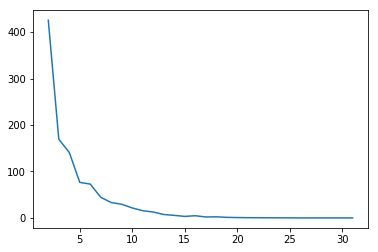

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

## TODO: plot the values of k as the X axis versus the costs (WSSSE) as the y axis
## Hint  : x=kvals,  y=wssses
plt.plot(kvals, wssses)

Using the Elbow method, what would be a good value of k?
